In [2]:
import numpy as np
import matplotlib.pyplot as plt

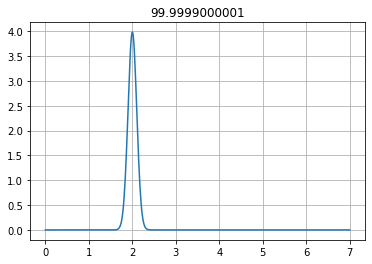

In [3]:
mu = 2
sigma = 0.0001
kappa = 1/(sigma**2 + 1e-2)

def gauss(x,mu = mu, kappa = kappa):
    return np.exp(kappa*np.cos(x-mu))/(2*np.pi*np.i0(kappa))

x = np.linspace(0,7,500)

fig, ax = plt.subplots()
ax.grid()
ax.set(title=kappa)

ax.plot(x,gauss(x))

In [29]:
N = 100
loss = np.zeros((N,N,3))
for i, mu in enumerate(np.linspace(0,10,N)):
    for j, sigma in enumerate(np.linspace(0,2,N)):
#         loss[i,j] = -np.log(gauss(3.5,mu,np.power(sigma,-2)))
        kappa = 1/(sigma**2 + 1e-2)
        lnI0 = np.log(np.cosh(kappa)) -0.25*np.log(1+0.25*np.square(kappa)) + np.log(1+0.24273*np.square(kappa)) - np.log(1+0.43023*np.square(kappa))
#         lnI0 = np.log(np.i0(kappa))
        loss[i,j,0] = -kappa*np.cos(3.5-mu) + lnI0# - kappa
        loss[i,j,1] = mu
        loss[i,j,2] = kappa
        
#     for j, kappa in enumerate(np.linspace(0.5,2,N)):
#             loss[i,j] = -np.log(gauss(3.5,mu,kappa))

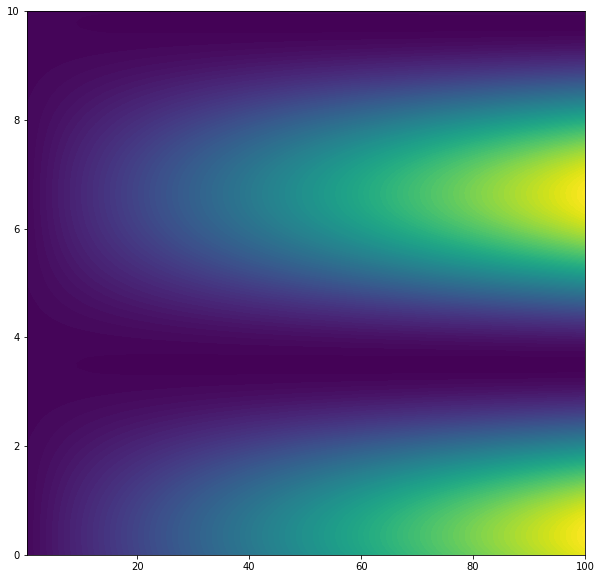

In [30]:
fig, ax  = plt.subplots(figsize=(10,10))
# ax.imshow(loss)
ax.contourf(loss[:,:,2],loss[:,:,1],loss[:,:,0],levels=100)

In [70]:
loss.max(), loss.min(), 2*np.pi

(196.74711693088315, -3.2105057611672123, 6.283185307179586)

Perhaps generalize to spherical instead of polar:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

<IPython.core.display.Javascript object>


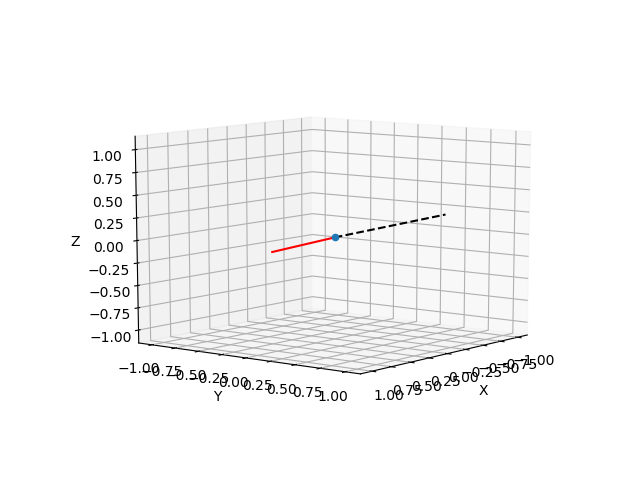

The cos of the angle between the vectors is: -0.8272542485937369, and the dot product is: -0.8272542485937369


In [4]:
def cos_angle(a,A,b,B): #a,A is theta, and b,B is phi
    c1 = np.cos(a-A+b-B)
    c2 = np.cos(a+A+b-B)
    c3 = np.cos(a-A-b+B)
    c4 = np.cos(a+A-b+B)
    c5 = np.cos(a-A)
    c6 = np.cos(a+A)
#     print(c1,c2,c3,c4,c5,c6)
    return 0.25*( c1 - c2 + c3 - c4) + 0.5*( c5 + c6 )
    
    
#     return 0.25*( np.cos(a-A+b-B) - np.cos(a+A+b-B) + np.cos(a-A-b+B) - np.cos(a+A-b+B) ) + 0.5*( np.cos(a-A) + np.cos(a+A) )

(a,b) = np.pi*np.array([0.6,2*0.7])
(A,B) = np.pi*np.array([0.4,2*0.3])

alpha = np.array([np.sin(a)*np.cos(b),np.sin(a)*np.sin(b),np.cos(a)])
beta = np.array([np.sin(A)*np.cos(B),np.sin(A)*np.sin(B),np.cos(A)])


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set(xlim=(-1.1,1.1),ylim=(-1.1,1.1),zlim=(-1.1,1.1),xlabel='X',ylabel='Y',zlabel='Z')

ax.plot([0,alpha[0]],[0,alpha[1]],[0,alpha[2]],'r')
ax.scatter(0,0,0,'b')
ax.plot([0,beta[0]],[0,beta[1]],[0,beta[2]],'k--')

print(f"The cos of the angle between the vectors is: {cos_angle(a,A,b,B)}, and the dot product is: {alpha@beta}")

0.7899922314973651

In [25]:
def cos_angle(a,A,b,B): #a,A is theta, and b,B is phi
    A = np.abs(A)
    c1 = np.cos(a-A+b-B)
    c2 = np.cos(a+A+b-B)
    c3 = np.cos(a-A-b+B)
    c4 = np.cos(a+A-b+B)
    c5 = np.cos(a-A)
    c6 = np.cos(a+A)
#     print(c1,c2,c3,c4,c5,c6)
    return 0.25*( c1 - c2 + c3 - c4) + 0.5*( c5 + c6 )

def cos_angle1(a,A,b,B):
    return np.sin(a)*np.cos(b)*np.sin(A)*np.cos(B) + np.sin(a)*np.sin(b)*np.sin(A)*np.sin(B) + np.cos(a)*np.cos(A)

a, b = 0.33, 0.65
print(cos_angle(a,-a,b,b))
print(cos_angle1(a,-a,b,b))

1.0
0.7899922314973652


Investigate what the range of zenith is:

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [49]:
d = pd.read_pickle('datasets/distributions.pkl')

In [75]:
# d['transformed']['truth']['zenith']['train']
d['raw']['truth']['pid']['train']

{'bin_edges': [-16, -14, -12, 12, 13, 14, 16],
 'hist': [109747, 124636, 122818, 277170, 1199801, 275552, 290276],
 'events': 2400000,
 'type': 'bar'}

In [2]:
data, slices = torch.load('datasets/muon_100k_set15.pt')
# data, slices = torch.load('dataset/processed/processed')

In [3]:
tfs = pd.read_pickle('datasets/transformers.pkl')
# tfs
# slices
# data.y = data.y.view(-1,8)

In [4]:
tfs['truth'].keys()

dict_keys(['energy_log10', 'time', 'direction_x', 'direction_y', 'direction_z', 'position_x', 'position_y', 'position_z', 'azimuth', 'zenith'])

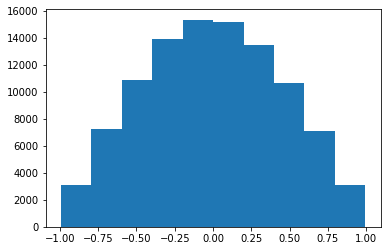

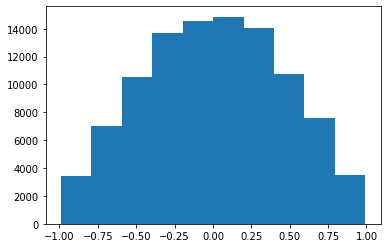

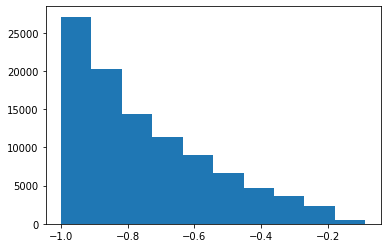

In [10]:
fig, ax = plt.subplots()

x = tfs['truth']['direction_x'].inverse_transform(data.y[:,5].view(-1,1))
y = tfs['truth']['direction_y'].inverse_transform(data.y[:,6].view(-1,1))
z = tfs['truth']['direction_z'].inverse_transform(data.y[:,7].view(-1,1))

ax.hist(x);

fig, ax = plt.subplots()
ax.hist(y);

fig, ax = plt.subplots()
ax.hist(z);
# ax.hist(data.y[:,5]);

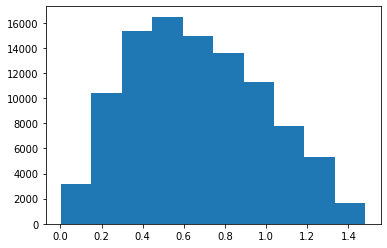

In [17]:
fig, ax = plt.subplots()
ax.hist(-(np.arccos(z) - np.pi));

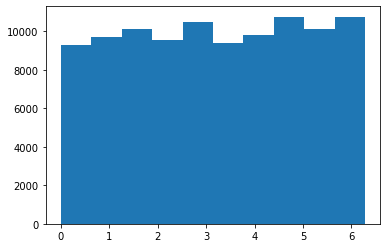

In [67]:
fig, ax = plt.subplots()
ax.hist(tfs['truth']['azimuth'].inverse_transform(data.y[:,8].view(-1,1)));
# ax.hist(data.y[:,7]);

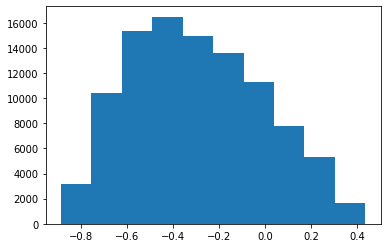

In [70]:
fig, ax = plt.subplots()
# ax.hist(tfs['truth']['zenith'].inverse_transform(data.y[:,9].view(-1,1)));
ax.hist(data.y[:,9]);

In [26]:
tfs['truth']['zenith'].scale_

array([1.11991644])

Of course change $$ln(sinh(x)) = x + ln(1-e^{-2x})$$

In [22]:
import torch
x = torch.tensor(123400,dtype=torch.float)

bad = torch.log(torch.sinh(x))
good = x + torch.log(1-torch.exp(-2*x)) - torch.log(torch.tensor(2.))

print(bad, good)

tensor(inf) tensor(123399.3047)


Spherical likelihood phasespace:

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
N = 100
loss = np.zeros((N,N,3))
for i, mu in enumerate(np.linspace(0,10,N)):
    for j, sigma in enumerate(np.linspace(1e-5,2,N)):
        kappa = 1/(sigma**2)
        lnC = - np.log(x) + x + np.log(1-np.exp(-2*x))
        loss[i,j,0] = -kappa*np.cos(3.5-mu) + lnC# - kappa
        loss[i,j,1] = mu
        loss[i,j,2] = kappa

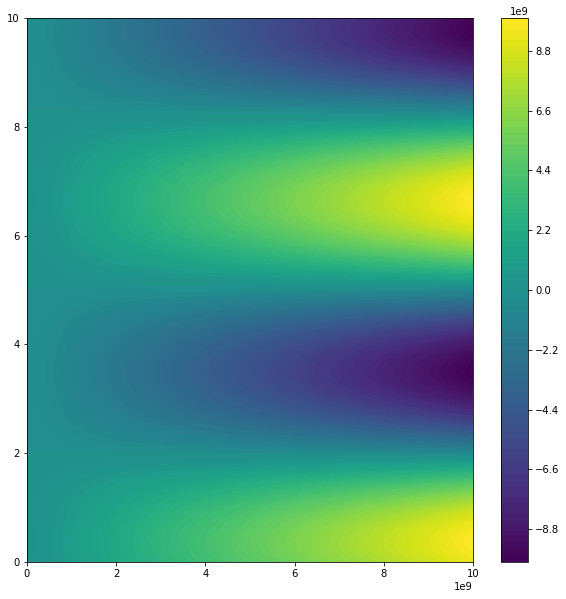

In [41]:
fig, ax  = plt.subplots(figsize=(10,10))
# ax.imshow(loss)
contour = ax.contourf(loss[:,:,2],loss[:,:,1],loss[:,:,0],levels=100)
# contour = ax.contourf(loss[:,:,2],loss[:,:,1],np.log(loss[:,:,0] - loss[:,:,0].min()),levels=100)
plt.colorbar(contour)